### TO IGNORE THE WARNINGS

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### IMPORTING ALL THE LIBRARIES

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

### READING THE CSV FILE 

In [ ]:
vac = pd.read_csv('h1n1_vaccine_prediction.csv')
vac.head(1)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0


### UNDERSTANDING THE DATA

In [ ]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
vac.shape

(26707, 34)

In [ ]:
vac["h1n1_vaccine"].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

###GRAPH SHOWING THE COUNT OF PEOPLE WHO HAD TAKEN VACCINE OR NOT
0 = NOT TAKEN 
1 = TAKEN


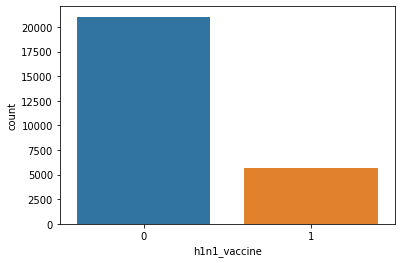

In [ ]:
sns.countplot(x = 'h1n1_vaccine',data = vac)
plt.show()

### GRAPH SHOWING THE COUNT OF PEOPLE WHO HAD TAKEN VACCINE OR NOT BASED ON GENDER

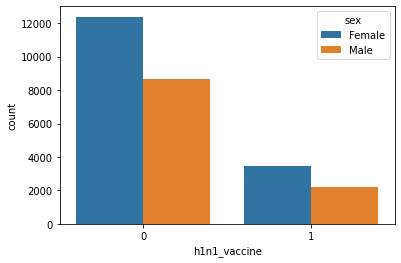

In [ ]:
sns.countplot(x = 'h1n1_vaccine',hue = "sex",data = vac)
plt.show()

### GRAPH SHOWING THE COUNT OF PEOPLE WHO HAD TAKEN VACCINE OR NOT BASED ON EDUCATION QUALIFICATION

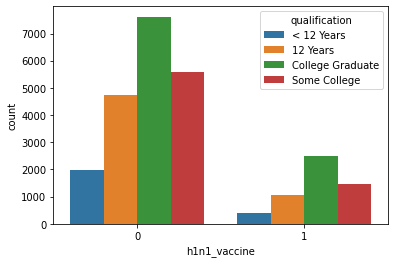

In [ ]:
sns.countplot(x = 'h1n1_vaccine',hue = "qualification",data = vac)
plt.show()

### GRAPH SHOWING THE COUNT OF PEOPLE WHO HAD TAKEN VACCINE OR NOT BASED ON THEIR AGE


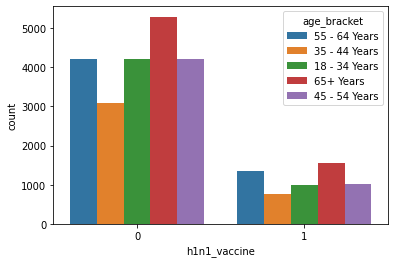

In [ ]:
sns.countplot(x = 'h1n1_vaccine',hue = "age_bracket",data = vac)
plt.show()

### GRAPH SHOWING THE COUNT OF PEOPLE WHO HAD TAKEN VACCINE OR NOT BASED ON COMMUNITY RACE

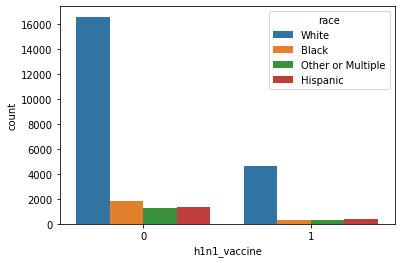

In [ ]:
sns.countplot(x = 'h1n1_vaccine',hue = "race",data = vac)
plt.show()

### GRAPH SHOWING THE COUNT OF PEOPLE WHO HAD TAKEN VACCINE OR NOT BASED ON THEIR MARITAL STATUS

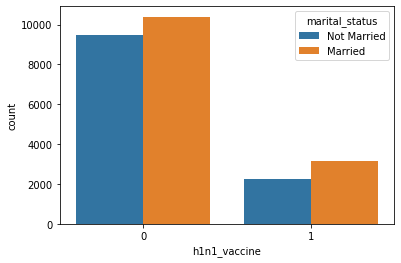

In [ ]:
sns.countplot(x = 'h1n1_vaccine',hue = "marital_status",data = vac)
plt.show()

### GRAPH SHOWING THE COUNT OF PEOPLE WHO HAD TAKEN VACCINE OR NOT BASED ON THEIR HOUSING STATUS

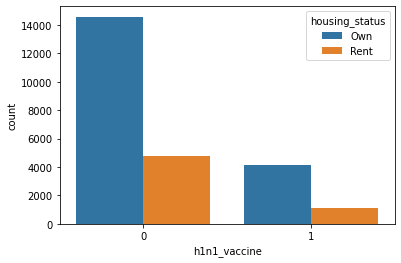

In [ ]:
sns.countplot(x = 'h1n1_vaccine',hue = "housing_status",data = vac)
plt.show()

### GRAPH SHOWING THE COUNT OF PEOPLE WHO HAD TAKEN VACCINE OR NOT BASED ON THEIR EMPLOYEMENT

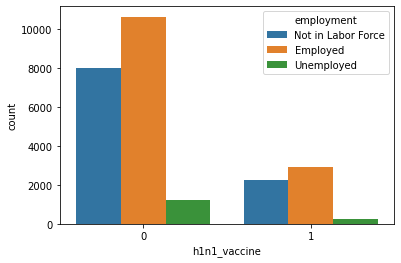

In [ ]:
sns.countplot(x = 'h1n1_vaccine',hue = "employment",data = vac)
plt.show()

CHECKING THE NULL VALUES

In [ ]:
nul = vac.isnull().sum()
nul

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
percent = (nul/26707)*100
percent

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

DROPING ALL THE COLUMNS HAVING NULL VALUES MORE THAN 20% OF THE TOTAL DATA

In [ ]:
vac.drop("has_health_insur", inplace = True, axis = 1 )

In [ ]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
null = vac.isnull().sum()
null
percent = (null/26707)*100
percent

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                           0.000000
income_level             

### FILLING THE NULL VALUES USING MODE

In [ ]:
vac["income_level"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [ ]:
display(vac["income_level"].mode()[0])

'<= $75,000, Above Poverty'

In [ ]:
vac["income_level"].fillna(vac["income_level"].mode()[0], inplace = True)


In [ ]:
vac["income_level"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [ ]:
vac.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [ ]:
column = ['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine']

### CREATING A FUNCTION TO FILL THE NULL VALUES USING MODE IN ALL THE NECESSARY COLUMNS

In [ ]:
def fillmode (df, col ):
  df[col].fillna(df[col].mode()[0], inplace = True)
  return df

In [ ]:
for a in column :
  vac = fillmode(vac,a)

In [ ]:
vac.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [ ]:
vac.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


### USING GET_DUMMIES FUNCTION TO ENCODE ALL THE CATEGORICAL DATA 

In [ ]:
vac["age_bracket"].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [ ]:
age = pd.get_dummies(vac["age_bracket"],drop_first=True,prefix = "age_bracket")
age.head()

,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years
0,0,0,1,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,1,0,0


### USING PD.CONCAT TO MERGE ALL THE ENCODED DATA COLUMNS IN THE DATASET

In [ ]:
vac = pd.concat([vac,age], axis=1)

### CREATING A FUNCTION TO ENCODE ALL THE CATEGORICAL DATA AND MERGE THE ENCODED DATA COLUMNS IN THE DATASET

In [ ]:
def dummy_creator (df,col):
  dummy = pd.get_dummies(df[col],drop_first=True,prefix = col)
  df = pd.concat([df,dummy], axis = 1)
  return df

In [ ]:
for a in ["qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa"]:
  vac = dummy_creator(vac,a)


###DROPPING THE ORIGINAL COLUMNS OF WHICH WE ENCODED THE DATA AND ADDED THE NEW ENDODED DATA COLUMNS IN THE DATASET

In [ ]:
vac.drop(["age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa"],inplace = True , axis = 1)

### CALLING THE REGRESSION MODEL

In [ ]:
lg= LogisticRegression()

In [ ]:
vac.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'no_of_adults', 'no_of_children', 'h1n1_vaccine',
       'age_bracket_35 - 44 Years', 'age_bracket_45 - 54 Years',
       'age_bracket_55 - 64 Years', 'age_bracket_65+ Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College', 'race_Hispanic', 'race_Other or Multiple',
       'race_White', 'sex_Male', 'income_level_> $75,000',
       'income_level_Below Poverty', 'marital_status_Not Married',
       'housing_status_Rent', '

### CREATING THE INDEPENDENT VARIABLE i.e. "X" AND DEPENDENT VARIABLE i.e. "Y" 

In [ ]:
x = vac.drop(["h1n1_vaccine"],axis = 1)
y = vac["h1n1_vaccine"]

In [ ]:
x.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'no_of_adults', 'no_of_children',
       'age_bracket_35 - 44 Years', 'age_bracket_45 - 54 Years',
       'age_bracket_55 - 64 Years', 'age_bracket_65+ Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College', 'race_Hispanic', 'race_Other or Multiple',
       'race_White', 'sex_Male', 'income_level_> $75,000',
       'income_level_Below Poverty', 'marital_status_Not Married',
       'housing_status_Rent', 'employment_Not i

In [ ]:
x.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,0,0,1,1,0,1,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,1,0,1,1,1,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,1,1,1,1,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

In [ ]:
### SPLITTING THE DATA USING TRAIN_TEST_SPLIT FUNCTION

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3,random_state = 0000)

### FITTING THE MODEL BY PROVIDING X_TRAIN AND Y_TRAIN AS INPUT

In [ ]:
lg.fit(x_train,y_train)

LogisticRegression()

### PREDICTING VALUES USING PREDICT FUNCTION PROVIDING X_TEST AS INPUT

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

### COMPARING THE VALUES OF Y_PRED AND Y_TEST USING ACCURACY SCORE AND CLASSIFICATION REPORT AND CONFUSION MATRIX

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.81792087857232

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6279
           1       0.64      0.37      0.47      1734

    accuracy                           0.82      8013
   macro avg       0.74      0.66      0.68      8013
weighted avg       0.80      0.82      0.80      8013



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[5916  363]
 [1096  638]]
